<a href="https://colab.research.google.com/github/chaitnaya0119/pandas_data_cleaning/blob/main/data_cleaning_netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/netflix1.csv")

In [12]:
np.random.seed(0)
df.shape

(8790, 10)

In [8]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [9]:
missing_count = df.isnull().sum()

In [13]:
missing_count

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [14]:
df.dropna()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [17]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [21]:
df = df.loc[:,'show_id':'release_year']
df.head()

,show_id,type,title,director,country,date_added,release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993


In [22]:
df.fillna(0)

,show_id,type,title,director,country,date_added,release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993


In [23]:
from scipy import stats

In [25]:
from mlxtend.preprocessing import minmax_scaling

In [26]:
import seaborn as sns

In [32]:
original_data= pd.DataFrame(df.release_year)
scaled_data = minmax_scaling(original_data,columns='release_year')
scaled_data.head()



0    0.964286
1    1.000000
2    1.000000
3    1.000000
4    0.000000
Name: release_year, dtype: float64

In [33]:
scaled_data.min()

0.0

In [35]:
scaled_data.max()

1.0

In [39]:
from matplotlib.figure import Figure

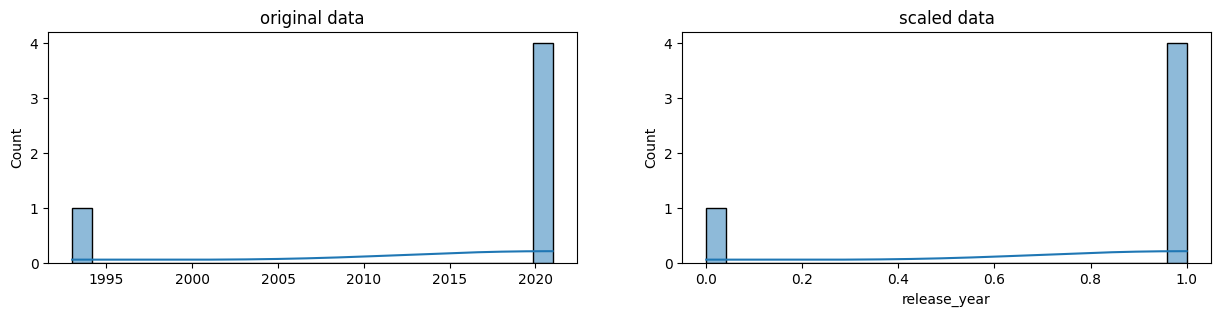

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data,ax=ax[0],kde=True,legend=False)
ax[0].set_title("original data")
sns.histplot(scaled_data,ax=ax[1],kde=True,legend=False)
ax[1].set_title("scaled data")
plt.show()

In [58]:
index_positive = df.release_year>0
positive = df.release_year.loc[index_positive]
normalized_data = pd.Series(stats.boxcox(positive)[0],name='release_year',index=positive.index)
normalized_data

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:933: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


0    inf
1    inf
2    inf
3    inf
4    inf
Name: release_year, dtype: float64

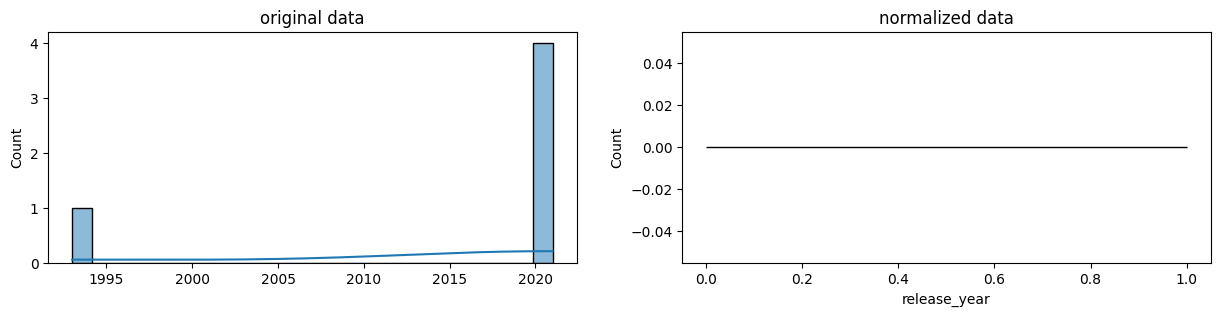

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data,ax=ax[0],kde=True,legend=False)
ax[0].set_title("original data")
sns.histplot(normalized_data,ax=ax[1],kde=True,legend=False)
ax[1].set_title("normalized data")
plt.show()

<ipython-input-67-5b22fea5d66f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(date_data.dt.day,kde=True,bins=31)


<Axes: xlabel='date_added', ylabel='Density'>

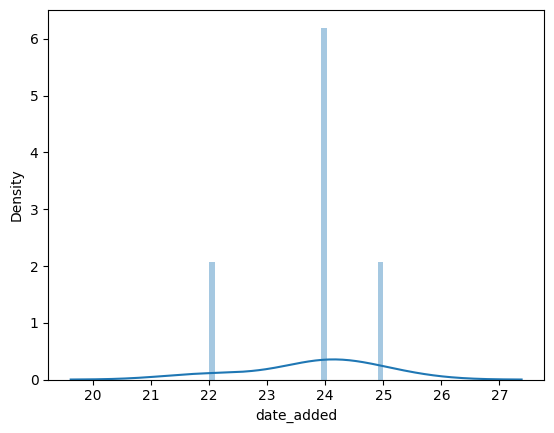

In [67]:
import datetime
date_data = pd.to_datetime(df['date_added'],infer_datetime_format=True)
sns.distplot(date_data.dt.day,kde=True,bins=31)